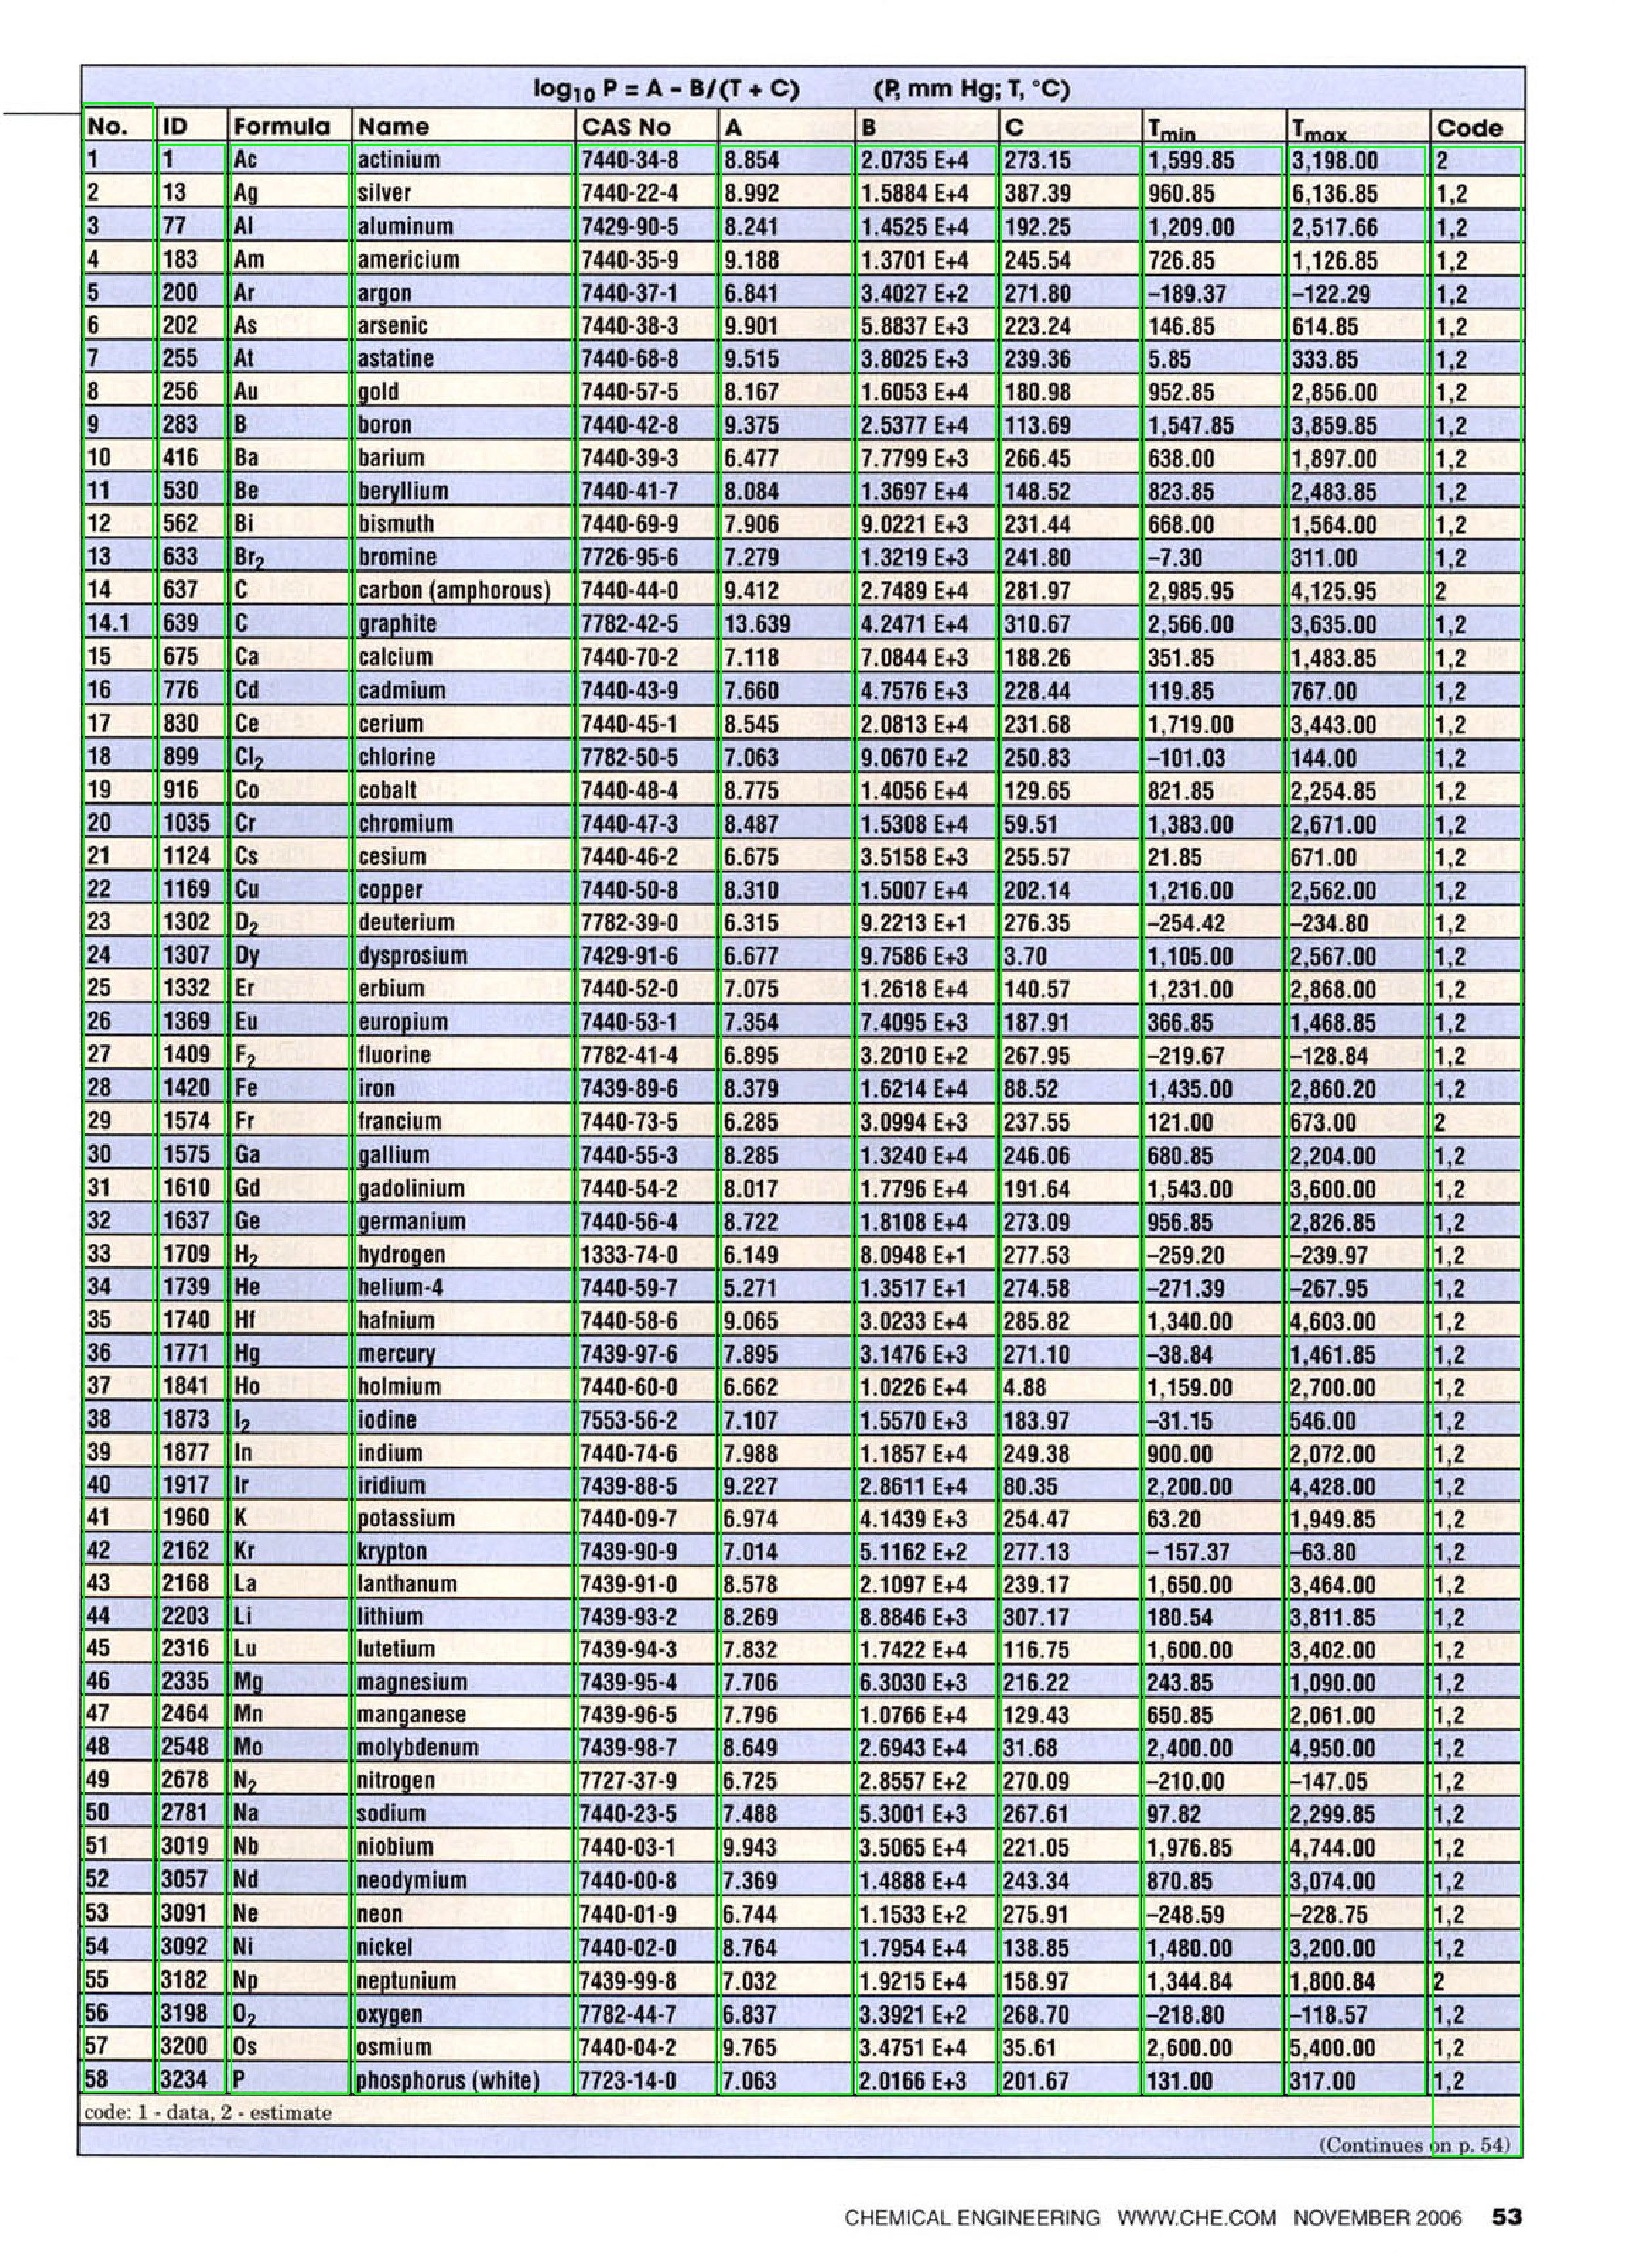

In [8]:
import IPython.display as display
import numpy as np
import cv2
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\JetBl\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

img = cv2.imread("table1.jpg")
img_copy = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh1 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

thresh2, img_bw = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
def noise_removal(image):
    ker = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, ker, iterations=1)
    image = cv2.erode(image, ker, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, ker)
    image = cv2.medianBlur(image, 3)
    return image
def thin_font(image):
    image = cv2.bitwise_not(image)
    ker = np.ones((2,2), np.uint8)
    image = cv2.erode(image, ker, iterations=1)
    image = cv2.bitwise_not(image)
    return image
no_noise = noise_removal(img_bw)
eroded_img = thin_font(no_noise)

vert_ker = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//150))
vert_erode = cv2.erode(thresh1, vert_ker, iterations=5)
vert_dilate = cv2.dilate(vert_erode, vert_ker, iterations=5)

cnts = cv2.findContours(vert_erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

cor1, cor2 = [], []
for n in range(len(cnts)):
    c = cnts[n]
    x, y, w, h = cv2.boundingRect(c)
    y += 20 # vertical translation
    h += 10
    image1 = cv2.rectangle(img_copy, (x,y), (x+w,y+h), (0,255,0), 2)
    if n == 0:
        cor1.append((x+w,y));
    elif n == len(cnts)-1:
        cor2.append((x,y+h))
    else:
        cor1.append((x+w,y))
        cor2.append((x,y+h))

if len(cor1) == len(cor2): # error catcher
    N = len(cor1)
    
i = 0
for n in range(N):
    image2 = cv2.rectangle(img, cor1[n], cor2[n], (0,255,0), 2)
    roi_vert = no_noise[cor1[n][1]:cor2[n][1], cor1[n][0]:cor2[n][0]]
    cv2.imwrite(f"roi_vert/roi{i}.jpg", roi_vert)
    i += 1

cv2.imwrite("result.jpg", image2)
display.display(display.Image("result.jpg"))

In [9]:
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\JetBl\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

def ocr_reading(img):
    img_open = Image.open(img)

    ocr_result = pytesseract.image_to_string(img_open)
    ocr_result = ocr_result.split("\n")

    while "" in ocr_result:
        ocr_result.remove("")
        
    return ocr_result

ocr_reading("roi_vert/roi3.jpg")

['actinium',
 'silver',
 'aluminum',
 'americium',
 'argon',
 'arsenic',
 'astatine',
 'gold',
 'boron',
 'barium',
 'beryllium',
 'bismuth',
 'bromine',
 'carbon (amphorous)',
 'graphite',
 'calcium',
 'cadmium',
 'cerium',
 'chlorine',
 'cobalt',
 'chromium',
 'cesium',
 'copper',
 'deuterium',
 'dysprasium',
 'erbium',
 'europium',
 'fluorine',
 'iron',
 'francium',
 'gallium',
 'gadolinium',
 'germanium',
 'hydrogen',
 'helium-4',
 'hafnium',
 'mercury',
 'holmium',
 'tadine',
 'indium',
 'iridium',
 'potassium',
 'krypton',
 'lanthanum',
 'lithium',
 'lutetium',
 'magnesium',
 'manganese',
 'molybdenum',
 'nitrogen',
 'sodium',
 'niobium',
 'neodymium',
 'reon',
 'nickel',
 'neptunium',
 'oxypen',
 'asmium',
 'phosphorus (white)']

In [10]:
import os
import csv
import pandas as pd
path = os.path.join(os.getcwd(), "roi_vert")
roi_files = os.listdir(path)

csv_file = open("yaws_csv_RAW.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(csv_file)

cols = ["No.", "ID", "Formula", "Name", "CAS No.", "A", "B", "C", "Tmin", "Tmax", "Code"]

N = len(roi_files)
for n in range(N):
    ocr_result = ocr_reading(f"roi_vert/{roi_files[n]}")
    ocr_result.insert(0, cols[n])
    csv_writer.writerow(ocr_result[:60]) #should be 59 row entries + column name
    
csv_file.close()


df = pd.read_csv("yaws_csv_RAW.csv") # create dataframe from csv saving
df_T = df.T # transpose the dataframe
df_T.to_csv("yaws_csv_RAW.csv", header=False) # overwrite the old .csv file
df = pd.read_csv("yaws_csv_RAW.csv") # reinitialize the dataframe with the correct .csv file
df

No.                                                 ID Formula  \
0          No..1                                                  l       _   
1             —_                                                  _      Py   
2            eee                                                 we      rR   
3              a                                                  |       =   
4            t—)                                                  ~      Py   
5             l”                                                  ~      nN   
6              _                                                  _      —t   
7              =                                                  a      nw   
8              |                                                 os       _   
9           —_.1                                                Lad       *   
10           _.1                                                i=)      nN   
11           |.1                                                (—}       _   
12           _.2                                                 RO      nm   
13            RO                                                [—J       _   
14           |.2                                                 BS       ~   
15           _.3                                                 ld     1.2   
16           wow                                                 ou     1,2   
17           |.3                                                 tn     1.2   
18          —_.2                                                lad     1,2   
19           =.1                                                 uo     1,2   
20           |.4                                              L— +]       _   
21             —                                               land     Lan   
22           =.2                                                  o       =   
23           _.4                                                 we      rR   
24           _.5                                                  =      —_   
25            on                                                 -_      he   
26           —_—                                                  a       —   
27            nm                                                  |      La   
28           —.1                                                 wn      —_   
29            ~d                                                  @      rn   
30          —_.3                                                  o      =o   
31            Co                                                 an      La   
32           |.5                                                 an      —_   
33            a"                                                 RO      rn   
34            wo                                                  a      —_   
35           lad                                                  w     La)   
36           [—]                                                 ow       _   
37  SPPPRSPPRRR|                                                 nn      Nn   
38           Sue                                                  w      —_   
39            Ge                                                  ~      nN   
40             w                                                  |       _   
41            oe                                                  a      nn   
42            qa                                                 [a  swells   
43          on.1                                                 wo      rp   
44           wen                                                 an      =_   
45             P                                                 ~~      m~   
46           [—)                                                 wn      oh   
47           |.6                                                  ~      nN   
48             >                                               por]      —_   
49          —_.4                                               

# <u>Horizontal `cv2` and OCR reading</u>:

In [ ]:
import IPython.display as display
import numpy as np
import cv2

img = cv2.imread("table1.jpg")
img_copy = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh1 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

hor_ker = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//150, 1))
hor_erode = cv2.erode(thresh1, hor_ker, iterations=7)
hor_dilate = cv2.dilate(hor_erode, hor_ker, iterations=7)

cnts = cv2.findContours(hor_erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])


thresh2, img_bw = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
def noise_removal(image):
    ker = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, ker, iterations=2)
    image = cv2.erode(image, ker, iterations=2)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, ker)
    image = cv2.medianBlur(image, 3)
    return image
def thin_font(image):
    image = cv2.bitwise_not(image)
    ker = np.ones((2,2), np.uint8)
    image = cv2.erode(image, ker, iterations=1)
    image = cv2.bitwise_not(image)
    return image
no_noise = noise_removal(img_bw)
eroded_img = thin_font(no_noise)


boxes = []
for n in range(len(cnts)):
    c = cnts[n]
    x, y, w, h = cv2.boundingRect(c)
    A, B, C, D = (x,y), (x+w,y), (x-50,y+h), (x+w,y+h)
    image1 = cv2.rectangle(img_copy, A, D, (0,255,0), 2)
    boxes.append([A, B, C, D])

boxes.pop(0) # removes the bounding box of the small random line to the left
N = len(boxes)

crnrs = []
i = 0
for n in range(N):
    if n == N-1:
        A_tilde, D_tilde = boxes[N-2][3], boxes[N-1][2]
        image2 = cv2.rectangle(img, A_tilde, D_tilde, (0,255,0), 2)
        crnrs.append([A_tilde, D_tilde])
        """roi = gray[D_tilde[1]:A_tilde[1], D_tilde[0]:A_tilde[0]]
        cv2.imwrite(f"roi_row//roi{i}.jpg", roi)""" # seems like this will make a duplicate row
    else:
        A_tilde, D_tilde = boxes[n][3], boxes[n+1][2]
        if abs(A_tilde[1]-D_tilde[1]) < 100:
            image2 = cv2.rectangle(img, A_tilde, D_tilde, (0,255,0), 2)
            crnrs.append([A_tilde, D_tilde])
            roi = img_bw[D_tilde[1]:A_tilde[1], D_tilde[0]:A_tilde[0]]
            cv2.imwrite(f"roi_row/roi{i}.jpg", roi)
    i += 1

cv2.imwrite("result.jpg", hor_dilate)
display.display(display.Image("result.jpg"))

<i>... So OCR reading via `cv2` bounding by rows is not a generally good approach. Reading by column seems much more effective.</i>

# <u>Scrap code:</u>

In [ ]:
import IPython.display

import cv2
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\JetBl\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

img = cv2.imread("table1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
ker = cv2.getStructuringElement(cv2.MORPH_RECT, (3,13))
dilate = cv2.dilate(thresh, ker, iterations=1)

cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])
green = (36, 255, 12)

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x+w, y+h), green, 2)
    cv2.imwrite("result.jpg", img)

IPython.display.display(IPython.display.Image("result.jpg"))

In [ ]:
hor_ker = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//150, 1))
hor_erode = cv2.erode(thresh1, hor_ker, iterations=5)
hor_dilate = cv2.dilate(hor_erode, hor_ker, iterations=5)

ker = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
grid = cv2.addWeighted(vert_dilate, 0.5, hor_dilate, 0.5, 0.0)
grid_erode = cv2.erode(~grid, ker, iterations=3)
thresh2, grid = cv2.threshold(grid, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

cnts, hierarchy = cv2.findContours(grid, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
bboxes = [cv2.boundingRect(c) for c in cnts]
(cnts, bboxes) = zip(*sorted(zip(cnts, bboxes), key=lambda x:x[1][1]))
boxes = []
for c in cnts:
    x, y, h, w = cv2.boundingRect(c)
    image = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
    boxes.append([x, y, w, h])

In [ ]:
import IPython.display as display
import numpy as np
import cv2
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\JetBl\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

img = cv2.imread("table1.jpg")
img_copy = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh1 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

hor_ker = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//150, 1))
hor_erode = cv2.erode(thresh1, hor_ker, iterations=5)
hor_dilate = cv2.dilate(hor_erode, hor_ker, iterations=5)

cnts = cv2.findContours(hor_erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

for n in range(len(cnts)):
    c = cnts[n]
    x, y, w, h = cv2.boundingRect(c)
    if x < 100:
        pass
    else:
        image1 = cv2.rectangle(img_copy, (x,y+h), (x+w,y), (0,255,0), 2)
        
cv2.imwrite("result.jpg", image1)
display.display(display.Image("result.jpg"))

# <u>References:</u>
> https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html <br><br>
https://medium.com/analytics-vidhya/table-detection-and-text-extraction-5a2934f61caa <br><br>
https://stackoverflow.com/questions/4869189/how-to-transpose-a-dataset-in-a-csv-file